# Introduction #

You'll build a model to predict hotel cancellations with a binary classifier.

In [1]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')



First, load the *Hotel Cancellations* dataset.

In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

hotel = pd.read_csv('hotel.csv')

X = hotel.copy()
y = X.pop('is_canceled')

X['arrival_date_month'] = \
    X['arrival_date_month'].map(
        {'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
    )

features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]
features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]]

In [10]:
for col in features_cat:
    print(X[col].unique())

['Resort Hotel' 'City Hotel']
[ 7  8  9 10 11 12  1  2  3  4  5  6]
['BB' 'FB' 'HB' 'SC' 'Undefined']
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
['No Deposit' 'Refundable' 'Non Refund']
['Transient' 'Contract' 'Transient-Party' 'Group']


In [4]:
X_train.shape[1]

63

# 1) Define Model #

The model we'll use this time will have both batch normalization and dropout layers. To ease reading we've broken the diagram into blocks, but you can define it layer by layer as usual.

Define a model with an architecture given by this diagram:

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/V04o59Z.png" width="400" alt="Diagram of network architecture: BatchNorm, Dense, BatchNorm, Dropout, Dense, BatchNorm, Dropout, Dense.">
<figcaption style="textalign: center; font-style: italic"><center>Diagram of a binary classifier.</center></figcaption>
</figure>


In [3]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Dropout , BatchNormalization

# YOUR CODE HERE: define the model given in the diagram
model = Sequential([BatchNormalization(input_shape=input_shape),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])



C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model2 = Sequential([BatchNormalization(input_shape=input_shape),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# 2) Add Optimizer, Loss, and Metric #

Now compile the model with the Adam optimizer and binary versions of the cross-entropy loss and accuracy metric.

In [4]:
# YOUR CODE HERE
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)



In [11]:
model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


Finally, run this cell to train the model and view the learning curves. It may run for around 60 to 70 epochs, which could take a minute or two.

Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7731 - loss: 0.4806 - val_accuracy: 0.8024 - val_loss: 0.4313
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8009 - loss: 0.4237 - val_accuracy: 0.8102 - val_loss: 0.4035
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8094 - loss: 0.4087 - val_accuracy: 0.8160 - val_loss: 0.3951
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8115 - loss: 0.4023 - val_accuracy: 0.8181 - val_loss: 0.3911
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8141 - loss: 0.3967 - val_accuracy: 0.8244 - val_loss: 0.3857
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8169 - loss: 0.3932 - val_accuracy: 0.8225 - val_loss: 0.3829
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8198 - loss: 0.3891 - val_accuracy: 0.8260 - val_loss: 0.3810
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8217 - loss: 0.3858 - val_accuracy: 0.

<Axes: title={'center': 'Accuracy'}>

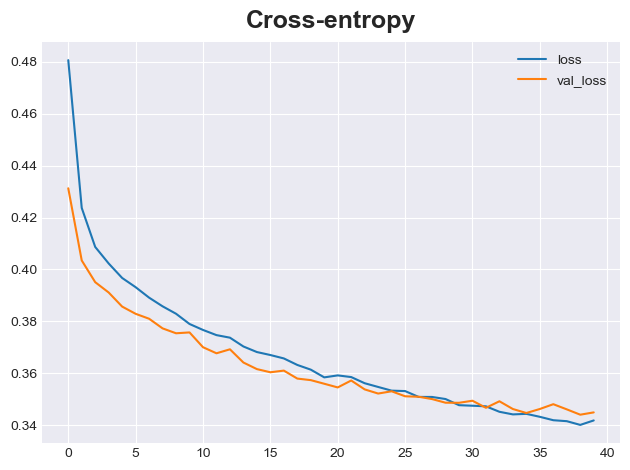

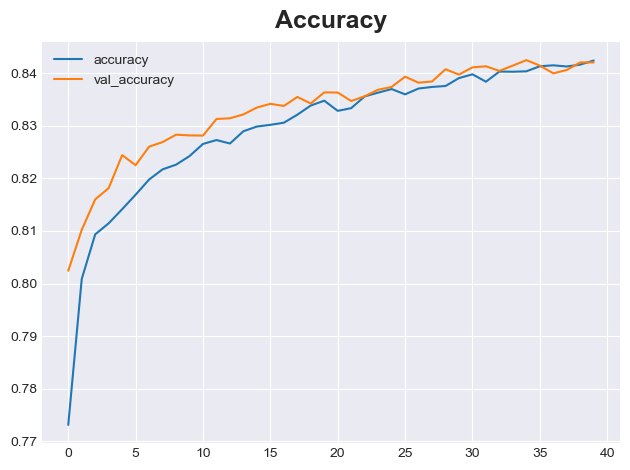

In [5]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

Epoch 1/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7987 - loss: 0.4268 - val_accuracy: 0.8057 - val_loss: 0.4273
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8192 - loss: 0.3886 - val_accuracy: 0.8187 - val_loss: 0.3931
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8245 - loss: 0.3768 - val_accuracy: 0.8216 - val_loss: 0.3872
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8294 - loss: 0.3681 - val_accuracy: 0.8201 - val_loss: 0.3869
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8326 - loss: 0.3627 - val_accuracy: 0.8199 - val_loss: 0.3850
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8359 - loss: 0.3569 - val_accuracy: 0.8268 - val_loss: 0.3765
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8367 - loss: 0.3527 - val_accuracy: 0.8250 - val_loss: 0.3790
Epoch 8/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8395 - loss: 0.3473 - val_accu

<Axes: title={'center': 'Accuracy'}>

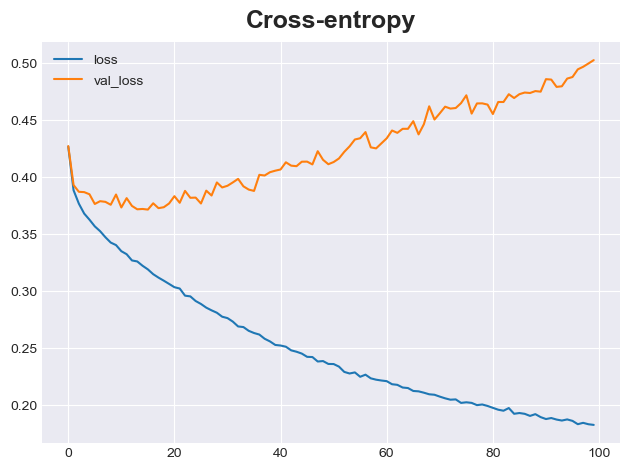

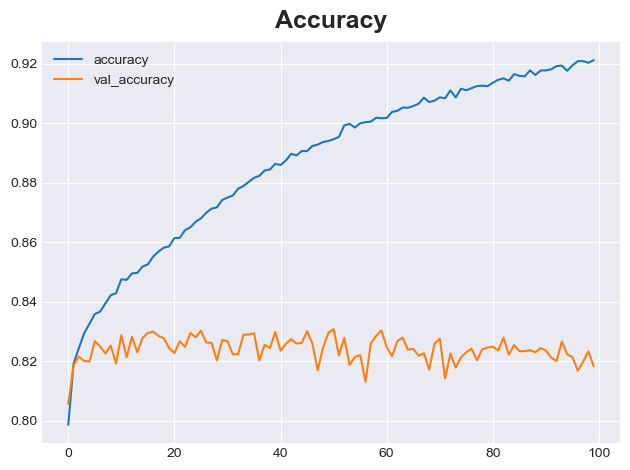

In [12]:
history2 = model2.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=100
)

history_df = pd.DataFrame(history2.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

In [6]:
# saving trained model
model.save('hotel_cancellation_model_with_dropout.keras')



In [16]:
X_train.shape

(89542, 63)

In [ ]:
 # make a function to take data from user ,  predict on new data from user , converting into (1,63) required shape and then predicting using saved model

In [ ]:
# taking input from user and predicting from the trained model



import numpy as np
input_data = np.array([[342, 5, 15, 2, 3, 2, 0, 0, 0, 0, 0, 0, 1, 0,
                        1]])
prediction = model.predict(input_data)
if prediction[0][0] >= 0.5:
    print("The booking is likely to be canceled.")
else:
    print("The booking is likely to be retained.")


# 3) Train and Evaluate #


What do you think about the learning curves? Does it look like the model underfit or overfit? Was the cross-entropy loss a good stand-in for accuracy?